In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [ ]:
pwd

'/content/drive/MyDrive/CNN'

In [ ]:

!unzip TRAIN_SET.zip


Archive:  TRAIN_SET.zip
replace TRAIN_SET/APPLES/0_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/drive/MyDrive/CNN/Dataset-20221105T032922Z-001.zip

Archive:  /content/drive/MyDrive/CNN/Dataset-20221105T032922Z-001.zip
  inflating: Dataset/TEST_SET/APPLES/r_184_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_27_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_121_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_26_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_19_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_31_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_183_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_105_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_124_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_29_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_17_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_112_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_23_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_28_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_24_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_106_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_15_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/15

Image Augumentation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#scaling,zooming

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

 Applying Image data generator functionality to training set and testing set

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/TRAIN_SET",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 2626 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/Dataset",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 1055 images belonging to 1 classes.


In [ ]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

**SPRINT-2**:MODEL BUILDING AND TESTING

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

Initializing the Model

In [ ]:
model=Sequential()

Creating the Model

In [ ]:
model.add(Conv2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 30752)             0         
                                                                 
 dense_14 (Dense)            (None, 300)               9225900   
                                                                 
 dense_15 (Dense)            (None, 300)               90300     
                                                                 
 dense_16 (Dense)            (None, 4)                 1204      
                                                      

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))

In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
len(x_train)

110

In [ ]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
110/110 [==============================] - 28s 246ms/step - loss: 1.6052 - accuracy: 0.2201 - val_loss: 8.1187 - val_accuracy: 0.0000e+00
Epoch 2/10
110/110 [==============================] - 23s 205ms/step - loss: 1.6019 - accuracy: 0.2334 - val_loss: 8.0633 - val_accuracy: 0.0000e+00
Epoch 3/10
110/110 [==============================] - 22s 200ms/step - loss: 1.6028 - accuracy: 0.2323 - val_loss: 8.0994 - val_accuracy: 0.0000e+00
Epoch 4/10
110/110 [==============================] - 22s 201ms/step - loss: 1.6019 - accuracy: 0.2289 - val_loss: 8.0964 - val_accuracy: 0.0000e+00
Epoch 5/10
110/110 [==============================] - 22s 198ms/step - loss: 1.6014 - accuracy: 0.2353 - val_loss: 8.0687 - val_accuracy: 0.0000e+00
Epoch 6/10
110/110 [==============================] - 22s 200ms/step - loss: 1.6012 - accuracy: 0.2357 - val_loss: 8.0986 - val_accuracy: 0.0000e+00
Epoch 7/10
110/110 [==============================] - 22s 201ms/step - loss: 1.6013 - accuracy: 0.2365 - v

Saving the Model

In [ ]:
model.save('train.h5')

In [ ]:
model.save('dataset.h5')

In [ ]:
model.save('fruits.h5')


Testing the Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('fruits.h5')

In [ ]:
model=load_model('train.h5')

In [ ]:
model=load_model('dataset.h5')

In [259]:
img=image.load_img(r"/content/drive/MyDrive/CNN/Dataset/TEST_SET/PINEAPPLE/125_100.jpg")

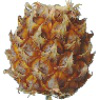

In [260]:
img

In [274]:
img=image.load_img(r"/content/drive/MyDrive/CNN/Dataset/TEST_SET/PINEAPPLE/125_100.jpg",target_size=(64,64))

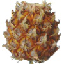

In [275]:
img

In [276]:
x=image.img_to_array(img)

In [277]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [278]:
x=np.expand_dims(x,axis=0)

In [279]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [280]:
pred = model.predict

In [281]:
pred

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f66e003bc90>>

In [282]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

44/44 [==============================] - 3s 67ms/step


In [283]:
predict_x

array([[0.22595379, 0.17237951, 0.18204266, 0.234894  , 0.18473   ],
       [0.22595379, 0.17237951, 0.18204266, 0.234894  , 0.18473   ],
       [0.22595379, 0.17237951, 0.18204266, 0.234894  , 0.18473   ],
       ...,
       [0.22595382, 0.17237952, 0.18204266, 0.23489404, 0.18473   ],
       [0.22595382, 0.17237952, 0.18204266, 0.23489404, 0.18473   ],
       [0.22595382, 0.17237952, 0.18204267, 0.23489404, 0.18473   ]],
      dtype=float32)

In [284]:
classes_x

array([3, 3, 3, ..., 3, 3, 3])

In [285]:
x_test.class_indices

{'TEST_SET': 0}

In [286]:
index=['APPLE','BANANA','ORANGE','PINEAPPLE','WATERMELON']

In [287]:
result=str(index[classes_x[0]])

In [288]:
result

'PINEAPPLE'